In [1]:
%matplotlib notebook

# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. This is the dataset to use for this assignment. Note: The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [2]:
import pandas as pd
import numpy as np
import folium
import math
import seaborn as sns
import matplotlib.pyplot as plt
from folium.plugins import MarkerCluster, HeatMap

## Here is The Sample Dataset

In [17]:
import pandas as pd
df = pd.read_csv("climate_dataset.csv")
df.head(15)

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106
5,USW00014833,2010-10-01,TMAX,194
6,USC00207308,2010-06-29,TMIN,144
7,USC00203712,2005-10-04,TMAX,289
8,USW00004848,2007-12-14,TMIN,-16
9,USC00200220,2011-04-21,TMAX,72


In [4]:
df.ID.unique();

In [19]:
df['Date']  =  pd.to_datetime(df['Date'])
len(df);

In [20]:
df =  df[~((df['Date'].dt.month == 2) & (df['Date'].dt.day == 29))]


### The rows and colums of dataset after quering 2005 to 2014 data , excluding leap days

In [22]:
df1 = df[df['Date'].dt.year != 2015]
df1.shape
print("Here is {} rows and {} columns in this dataset after cleaning the dataset for analyzing".format(df1.shape[0], df1.shape[1]))

Here is 151245 rows and 4 columns in this dataset after cleaning the dataset for analyzing


In [9]:
df2 = df1.groupby(df1['Date'].dt.strftime('%m-%d')).agg({"Data_Value": [np.max, np.min]})
#df2 = df2['Data_Value']/10 
#df2 = df2.droplevel(level=0, axis = 1)
df2;

### Sample data for 10 years Max and MIN and 2015 MAX and MIN  temperature over the 365 days
#### That means this dataset is about 365 rows

In [14]:
df2 = df1.groupby(df1['Date'].dt.strftime('%m-%d')).agg({"Data_Value": [np.max, np.min]})
df2 = df2['Data_Value']/10 
#df2 = df2.droplevel(level=0, axis = 1)
df2

df_2015 = df[df['Date'].dt.year == 2015]
df_2015.head()

df_2015 = df_2015.groupby(df['Date'].dt.strftime("%m-%d")).agg({"Data_Value": [np.max, np.min]}).droplevel(level=0, axis=1)


df_2015 = df_2015/10
max_2015 = df_2015[(df_2015["amax"] > df2["amax"])]["amax"] 
min_2015 = df_2015[(df_2015['amin'] < df2["amin"])]["amin"]

df2 =  df2.merge(max_2015, left_index=True, right_index= True, how="left")
df2 = df2.merge(min_2015, left_index=True, right_index=True, how="left")

df2.rename(columns={"amax_x" : "max_10_yr",
                    "amin_x" :  "min_10_yr",
                  "amax_y": "max_2015",
                  "amin_y" : "min_2015"}).head(10)


,max_10_yr,min_10_yr,max_2015,min_2015
Date,,,,
01-01,15.6,-16.0,NaN,NaN
01-02,13.9,-26.7,NaN,NaN
01-03,13.3,-26.7,NaN,NaN
01-04,10.6,-26.1,NaN,NaN
01-05,12.8,-15.0,NaN,-15.5
01-06,18.9,-26.6,NaN,NaN
01-07,21.7,-30.6,NaN,NaN
01-08,19.4,-29.4,NaN,NaN
01-09,17.8,-27.8,NaN,NaN


In [655]:
# df = df2.merge(df1, on = "Data_Value", how="inner")
# #df.drop_duplicates("Date", keep="first", inplace=True)
# #df.shape
# df

In [23]:
df2;

### The line Chart For 10 years MAX and MIn Temperature 
#### The scatter plot for 2015 Max and MIN which exceed the 10 years record

<IPython.core.display.Javascript object>


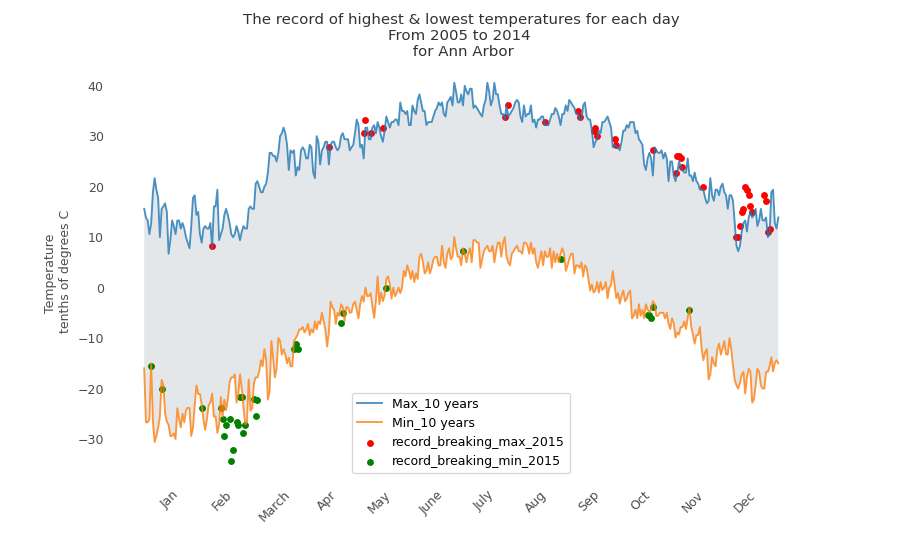

In [16]:
month = ["Jan", "Feb", "March", "Apr", "May", "June", "July", "Aug", "Sep", "Oct", "Nov", "Dec"]

pos = np.arange(15, len(df2.index), 30)
plt.figure(figsize=(10,6))

plt.plot(range(len(df2.index)), df2["amax_x"], alpha=0.8, label="Max_10 years")
plt.plot(range(len(df2.index)), df2["amin_x"], alpha=0.8, label="Min_10 years")

plt.xticks(pos , month, alpha=0.7)
plt.ylabel("Temperature \n tenths of degrees C ", alpha=0.7)
plt.yticks(alpha=0.7)
plt.legend(["Max", "Min"], title="Temperature", frameon=True)
plt.title("""The record of highest & lowest temperatures for each day\nFrom 2005 to 2014 \n for Ann Arbor""",
          alpha=0.8)
# to rotate 45 degree Xtick label
for child in plt.gca().xaxis.get_ticklabels():
    child.set_rotation(45)

# to remove the ticks in both columns
plt.tick_params(top=False, bottom=False, left=False, right=False, labelbottom=True, labelleft=True)

# Fill between the two min and max
plt.fill_between(range(len(df2.index)), y1= df2['amax_x'], y2=df2['amin_x'],
                facecolor="lightslategrey",
                alpha=0.20)

# remove the ractangualr
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_visible(False)

# plot scater
#plt.scatter(range(len(df2.index)), df2["amin_y"], s=10)
plt.scatter(range(len(df2)) ,df2['amax_y'],s= 20, color="red", label="record_breaking_max_2015")
plt.scatter(range(len(df2)) ,df2['amin_y'], s= 20 , color="green", label="record_breaking_min_2015")

plt.legend(frameon=True, loc="lower center")

    

plt.show()